<a href="https://colab.research.google.com/github/Zangetsu112/Cats-Dogs-ClassifierCNN/blob/main/CatsDogsKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from tensorflow.keras import optimizers
model.compile(loss="binary_crossentropy", 
                optimizer=optimizers.RMSprop(learning_rate=1e-4), 
                metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        "/content/drive/MyDrive/cats-and-dogs/train",
        target_size=(150, 150),
        batch_size=20, 
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        "/content/drive/MyDrive/cats-and-dogs/validation", 
        target_size=(150, 150),
        batch_size=20, 
        class_mode='binary')


Found 2030 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [3]:
history = model.fit(
        train_generator, 
        steps_per_epoch=100, 
        epochs=70, 
        validation_data=validation_generator, 
        validation_steps=50)

model.save('/content/drive/MyDrive/cats-and-dogs/cats-and-dogs-v1.h5')

Epoch 1/70
100/100 [==============================] - 146s 1s/step - loss: 0.6939 - accuracy: 0.5050 - val_loss: 0.7073 - val_accuracy: 0.3580
Epoch 2/70
100/100 [==============================] - 121s 1s/step - loss: 0.6834 - accuracy: 0.5618 - val_loss: 0.6302 - val_accuracy: 0.6880
Epoch 3/70
100/100 [==============================] - 122s 1s/step - loss: 0.6744 - accuracy: 0.5698 - val_loss: 0.7980 - val_accuracy: 0.4100
Epoch 4/70
100/100 [==============================] - 121s 1s/step - loss: 0.6691 - accuracy: 0.5990 - val_loss: 0.6815 - val_accuracy: 0.5700
Epoch 5/70
100/100 [==============================] - 122s 1s/step - loss: 0.6586 - accuracy: 0.5990 - val_loss: 0.6295 - val_accuracy: 0.6630
Epoch 6/70
100/100 [==============================] - 120s 1s/step - loss: 0.6395 - accuracy: 0.6307 - val_loss: 0.6427 - val_accuracy: 0.6270
Epoch 7/70
100/100 [==============================] - 123s 1s/step - loss: 0.6378 - accuracy: 0.6342 - val_loss: 0.5561 - val_accuracy: 0.7470

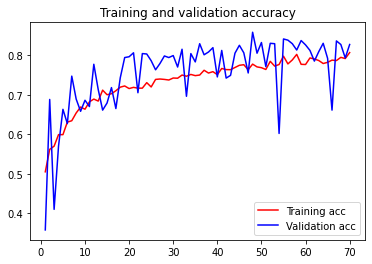

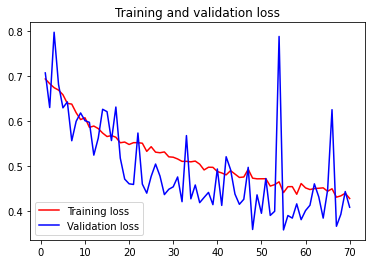

In [4]:
import matplotlib.pyplot as plt 

acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = [x for x in range(1, len(acc)+1)]

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.legend()
plt.title('Training and Validation loss')
plt.show()

In [5]:
test_generator = test_datagen.flow_from_directory(
        "/content/drive/MyDrive/cats-and-dogs/test", 
        target_size=(150, 150),
        batch_size=20, 
        class_mode='binary')
model.evaluate(test_generator, batch_size=20)

Found 1510 images belonging to 2 classes.
76/76 [==============================] - 255s 3s/step - loss: 0.4330 - accuracy: 0.8172


[0.432990700006485, 0.817218542098999]